In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 8.53.54 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 9.27.26 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.58.13 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.47.41 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.56.30 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.11.17 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/vertical_flip_Screen Shot 2018-06-12 at 9.19.08

In [2]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
from distutils.dir_util import copy_tree

train_folder = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
test_folder = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'

# Make a new train folder with fresh fruits
toDirectory = '/kaggle/working/train/freshfruits';

fromDirectory = train_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

# Make a new train folder with rotten fruits
toDirectory = '/kaggle/working/train/rottenfruits';

fromDirectory = train_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

# Make a new validation folder with fresh fruits
toDirectory = '/kaggle/working/validation/freshfruits';

fromDirectory = test_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

# Make a new validation folder with rotten fruits
toDirectory = '/kaggle/working/validation/rottenfruits';

fromDirectory = test_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

In [13]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [18]:
try:
    base_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [19]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [24]:
import os
dataset_train_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
dataset_test_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'


fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [25]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [39]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150),
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 7308 images belonging to 2 classes.
Found 3593 images belonging to 2 classes.


In [45]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 93):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [43]:
train_len = 0
for foldername in os.listdir('/kaggle/working/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/kaggle/working/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/kaggle/working/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/kaggle/working/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7308
3593


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=20,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/20
228/228 [==============================] - 338s 1s/step - loss: 0.2387 - accuracy: 0.9019 - val_loss: 0.2281 - val_accuracy: 0.9171
Epoch 2/20
228/228 [==============================] - 359s 2s/step - loss: 0.2177 - accuracy: 0.9122 - val_loss: 0.2166 - val_accuracy: 0.9151
Epoch 3/20
228/228 [==============================] - 332s 1s/step - loss: 0.2073 - accuracy: 0.9149 - val_loss: 0.2382 - val_accuracy: 0.8959
Epoch 4/20
228/228 [==============================] - 355s 2s/step - loss: 0.2104 - accuracy: 0.9167 - val_loss: 0.1921 - val_accuracy: 0.9237
Epoch 5/20
228/228 [==============================] - 329s 1s/step - loss: 0.2029 - accuracy: 0.9164 - val_loss: 0.2008 - val_accuracy: 0.9257
Epoch 6/20
228/228 [==============================] - 362s 2s/step - loss: 0.1959 - accuracy: 0.9219 - val_loss: 0.1653 - val_accuracy: 0.9393
Epoch 7/20
228/228 [==============================] - 332s 1s/step - loss: 0.1965 - accuracy: 0.9184 - val_loss: 0.1939 - val_accuracy: 0.9207

In [48]:
model.save('model.h5')

<Figure size 640x480 with 0 Axes>

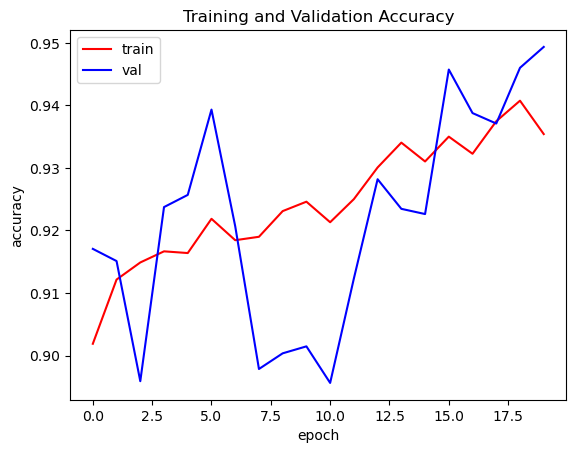

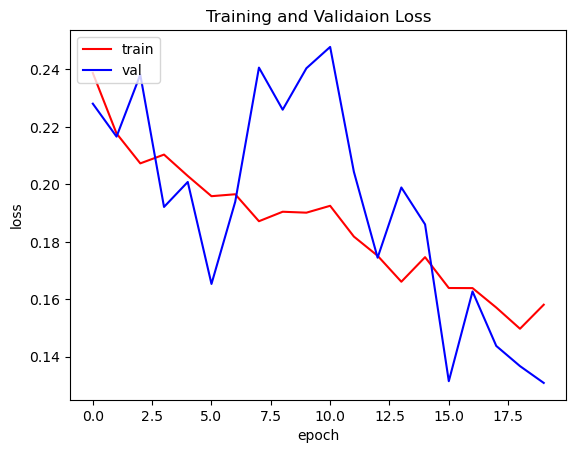

<Figure size 640x480 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()